<a href="https://colab.research.google.com/github/phong516/AI_Course/blob/main/homeworkFuzzy/NutritionalNeeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


2179.689832107888


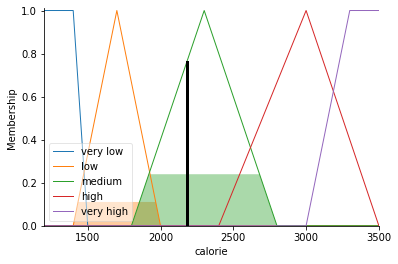

In [16]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

activity = ctrl.Antecedent(np.arange(0,11,1), 'activity')
activity['very light'] 	= fuzz.trimf(activity.universe, [0, 0, 2.5])
activity['light']		= fuzz.trimf(activity.universe, [0, 2.5, 5])
activity['moderate']	= fuzz.trimf(activity.universe, [2.5, 5, 7.5])
activity['heavy']		= fuzz.trimf(activity.universe, [5, 10, 10])

bmi = ctrl.Antecedent(np.arange(10,36,1), 'bmi')
bmi['skinny']		= fuzz.trimf(bmi.universe, [10, 10, 17])
bmi['thin']	        = fuzz.trimf(bmi.universe, [16, 17.75, 18.5])
bmi['normal']		= fuzz.trimf(bmi.universe, [17.5, 21.75, 25])
bmi['overweight']	= fuzz.trimf(bmi.universe, [24, 26, 27])
bmi['obesity']		= fuzz.trimf(bmi.universe, [26, 35, 35])

age = ctrl.Antecedent(np.arange(13, 81, 1), 'age')
age['young'] = fuzz.trapmf(age.universe, [13, 13, 25, 30])
age['middle'] = fuzz.trimf(age.universe, [25, 50, 65])
age['old'] = fuzz.trapmf(age.universe, [50, 65, 80, 80])

gender = ctrl.Antecedent(np.arange(0, 2, 1), 'gender')
gender['female'] = fuzz.trimf(gender.universe, [0, 0, 1])
gender['male'] = fuzz.trimf(gender.universe, [0, 1, 1])

calorie = ctrl.Consequent(np.arange(1200,3501,1), 'calorie')
calorie['very low'] = fuzz.trapmf(calorie.universe, [1200, 1200, 1400, 1500])
calorie['low'] = fuzz.trimf(calorie.universe, [1400, 1700, 2000])
calorie['medium'] = fuzz.trimf(calorie.universe, [1800, 2300, 2800])
calorie['high'] = fuzz.trimf(calorie.universe, [2400, 3000, 3500])
calorie['very high'] = fuzz.trapmf(calorie.universe, [3000, 3300, 3500, 3500])

"""activity.view()
gender.view()
age.view()
bmi.view()
calorie.view()"""

rule1 = ctrl.Rule(bmi['skinny'] & (activity['very light'] | activity['light']) & (gender['male']) & (age['young']), calorie['low'])

rule2 = ctrl.Rule(bmi['thin'] & (activity['very light'] | activity['light']) & (gender['male']) & (age['middle']), calorie['low'])

rule3 = ctrl.Rule(bmi['normal'] & (activity['light'] | activity['moderate']) & (gender['male']) & (age['young'] | age['middle']), calorie['medium'])

rule4 = ctrl.Rule(bmi['overweight'] & (activity['moderate'] | activity['heavy']) & (gender['male']) & (age['middle'] | age['old']), calorie['medium'])

rule5 = ctrl.Rule(bmi['obesity'] & (activity['moderate'] | activity['heavy']) & (gender['male']) & (age['young'] | age['middle'] | age['old']), calorie['high'])

rule6 = ctrl.Rule(bmi['skinny'] & (activity['moderate'] | activity['heavy']) & (gender['female']) & (age['young']), calorie['low'])

rule7 = ctrl.Rule(bmi['thin'] & (activity['moderate'] | activity['heavy']) & (gender['female']) & (age['middle'] | age['old']), calorie['low'])

rule8 = ctrl.Rule(bmi['normal'] & (activity['light'] | activity['moderate']) & (gender['female']) & (age['young'] | age['middle']), calorie['medium'])

rule9 = ctrl.Rule(bmi['overweight'] & (activity['moderate'] | activity['heavy']) & (gender['female']) & (age['middle'] | age['old']), calorie['medium'])

rule10 = ctrl.Rule(bmi['normal'] & age['middle'] & activity['heavy'], calorie['high'])

rule11 = ctrl.Rule(bmi['overweight'] & age['young'] & activity['very light'], calorie['low'])

rule12 = ctrl.Rule(bmi['overweight'] & age['young'] & activity['light'], calorie['medium'])

rule13 = ctrl.Rule(bmi['overweight'] & age['young'] & activity['moderate'], calorie['medium'])

rule14 = ctrl.Rule(bmi['overweight'] & age['young'] & activity['heavy'], calorie['high'])

rule15 = ctrl.Rule(bmi['overweight'] & age['middle'] & activity['very light'], calorie['low'])

rule16 = ctrl.Rule(bmi['overweight'] & age['middle'] & activity['light'], calorie['medium'])

rule17 = ctrl.Rule(bmi['overweight'] & age['middle'] & activity['moderate'], calorie['high'])

rule18 = ctrl.Rule(bmi['overweight'] & age['middle'] & activity['heavy'], calorie['high'])

rule19 = ctrl.Rule(bmi['overweight'] & age['old'] & activity['very light'], calorie['low'])

rule20 = ctrl.Rule(bmi['overweight'] & age['old'] & activity['light'], calorie['medium'])

rule21 = ctrl.Rule(bmi['overweight'] & age['old'] & activity['moderate'], calorie['medium'])

rule22 = ctrl.Rule(bmi['overweight'] & age['old'] & activity['heavy'], calorie['high'])

rule = []
for i in range(1, 23):
    rule.append(locals()["rule" + str(i)])

calorie_ctrl = ctrl.ControlSystem(rule)

dailyCalorie = ctrl.ControlSystemSimulation(calorie_ctrl)

Height = 170		#in cm
Weight = 70			#in kg

Gender = 1			#female = 0, male = 1
Age = 25			#from 13 to 80
activity = 1		#from 0 to 10

BMI = Weight/((Height/100)**2)

dailyCalorie.input['bmi'] = BMI

dailyCalorie.input['activity'] = activity

dailyCalorie.input['gender'] = Gender

dailyCalorie.input['age'] = Age

dailyCalorie.compute()

print (dailyCalorie.output['calorie'])



calorie.view(sim=dailyCalorie)
